In [1]:
reset -fs

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

%matplotlib inline

In [4]:
carseat_data = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Carseats.csv')
carseat_data.columns = [c.lower() for c in carseat_data.columns]
carseat_data.head()

,sales,compprice,income,advertising,population,price,shelveloc,age,education,urban,us
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


//anaconda3/envs/nf/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead
  after removing the cwd from sys.path.


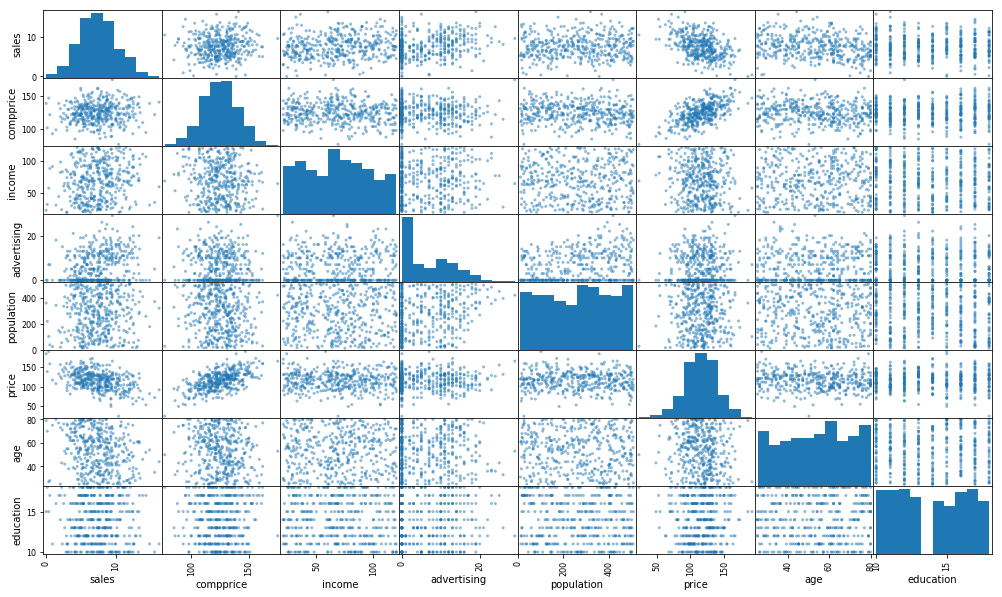

In [5]:
pd.scatter_matrix(carseat_data, 
                  figsize=(17, 10), 
                  edgecolor='none', 
                  alpha=0.5);

In [6]:
explanatory_vars = list(carseat_data.columns)
explanatory_vars = [e for e in explanatory_vars 
                        if e not in ('shelveloc', 'urban', 'us')]
explanatory_vars

['sales',
 'compprice',
 'income',
 'advertising',
 'population',
 'price',
 'age',
 'education']

In [7]:
import statsmodels.formula.api as smf

In [8]:
print('R squared for each possible explanatory variable:' )
for explanatory_var in explanatory_vars:
    model = 'sales ~ {:}'.format(explanatory_var)
    rs = smf.ols(formula=model, data=carseat_data).fit().rsquared
    print('{:7s} \t \t= {:.3}'.format(explanatory_var, rs))
    
# sales predicting salesis included as explanatory variable for sanity check

R squared for each possible explanatory variable:
sales   	 	= 1.0
compprice 	 	= 0.00411
income  	 	= 0.0231
advertising 	 	= 0.0726
population 	 	= 0.00255
price   	 	= 0.198
age     	 	= 0.0537
education 	 	= 0.0027


In [7]:
smf.ols(formula='sales ~ price', data=carseat_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.198
Model:                            OLS   Adj. R-squared:                  0.196
Method:                 Least Squares   F-statistic:                     98.25
Date:                Fri, 24 Feb 2017   Prob (F-statistic):           7.62e-21
Time:                        10:04:17   Log-Likelihood:                -938.23
No. Observations:                 400   AIC:                             1880.
Df Residuals:                     398   BIC:                             1888.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     13.6419      0.633     21.558      0.000      12.398      14.886
price         -0.0531      0.005     -9.912      0.000      -0.064      -0.043
==============================================================================
Omnibus:                        2.537   Durbin-Watson:                   1.892
Prob(Omnibus):                  0.281   Jarque-Bera (JB):                2.611
Skew:                           0.175   Prob(JB):                        0.271
Kurtosis:                       2.816   Cond. No.                         591.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
model = 'sales ~ compprice + income + advertising + population + price + age + education'
smf.ols(formula=model, data=carseat_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.542
Model:                            OLS   Adj. R-squared:                  0.533
Method:                 Least Squares   F-statistic:                     66.18
Date:                Fri, 24 Feb 2017   Prob (F-statistic):           1.41e-62
Time:                        10:04:20   Log-Likelihood:                -826.32
No. Observations:                 400   AIC:                             1669.
Df Residuals:                     392   BIC:                             1701.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.7077      1.118      6.896      0.000       5.510       9.905
compprice       0.0939      0.008     11.980      0.000       0.079       0.109
income          0.0129      0.003      3.703      0.000       0.006       0.020
advertising     0.1309      0.015      8.654      0.000       0.101       0.161
population     -0.0001      0.001     -0.180      0.857      -0.001       0.001
price          -0.0925      0.005    -18.314      0.000      -0.102      -0.083
age            -0.0450      0.006     -7.485      0.000      -0.057      -0.033
education      -0.0400      0.037     -1.077      0.282      -0.113       0.033
==============================================================================
Omnibus:                        8.263   Durbin-Watson:                   1.969
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                7.705
Skew:                           0.288   Prob(JB):                       0.0212
Kurtosis:                       2.639   Cond. No.                     4.05e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [9]:
# Remove population and education. They have the largest p-values!
model = 'sales ~ compprice + income + advertising + price + age'
smf.ols(formula=model, data=carseat_data).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.534
Method:                 Least Squares   F-statistic:                     92.62
Date:                Fri, 24 Feb 2017   Prob (F-statistic):           2.70e-64
Time:                        10:05:00   Log-Likelihood:                -826.92
No. Observations:                 400   AIC:                             1666.
Df Residuals:                     394   BIC:                             1690.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       7.1092      0.944      7.531      0.000       5.253       8.965
compprice       0.0939      0.008     12.051      0.000       0.079       0.109
income          0.0131      0.003      3.779      0.000       0.006       0.020
advertising     0.1306      0.015      8.963      0.000       0.102       0.159
price          -0.0925      0.005    -18.347      0.000      -0.102      -0.083
age            -0.0450      0.006     -7.503      0.000      -0.057      -0.033
==============================================================================
Omnibus:                        9.073   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.011   Jarque-Bera (JB):                8.154
Skew:                           0.288   Prob(JB):                       0.0170
Kurtosis:                       2.602   Cond. No.                     1.89e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.89e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""